In [1]:
# --------------------------------------------------------------------------------------------------- #
## ---------------------      Import libraries and data       ------------------------ ##

# Run this cell first before running any other cells

import os
import fnmatch
import pandas as pd
import numpy as np

import time

In [2]:
# Select surgery: 0 or 1
# 0 - Pericardiocentesis
# 1 - Thoracentesis
surgery_selected = 1

# File path to the database files
#source_path = os.getcwd() + '/../..' + '/Data/Data_04152021'
# source_path = os.getcwd() + '/../../Nihar/ML-data/SurgicalData'
source_path = 'D:/Documents/PhD/PhD_Research/ML-data/SurgicalData/Manually_Cleaned_And_Annotated_06272021'
#save_to_folder = '/ThresholdFilter'

surgery_name_list = ['/Pericardiocentesis',
                     '/Thoracentesis']

# Get list of all data directories
#performance_list = os.listdir(source_path + surgery_name_list[surgery_selected] + '/')

sensor_id_list = ['0.csv', '1.csv', '2.csv', '3.csv']

# Determine the thresholds for normalization

## Import data for visualization
# obtain list of files

input_folder = '/ThresholdFilter'
save_to_folder = '/DataVisualization'


          level  counts
0        Expert      31
1  Intermediate       6
2        Novice       6
          level  counts
0        Expert      31
1  Intermediate       6
2        Novice       6
          level  counts
0        Novice      17
1        Expert      13
2  Intermediate      13
          level  counts
1        Expert      13
2  Intermediate      13
0        Novice      17


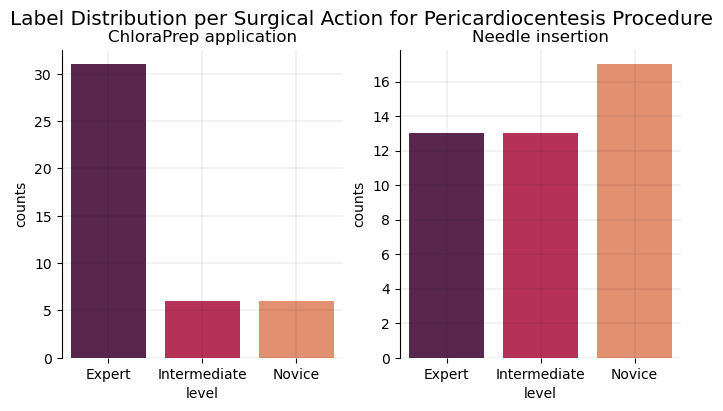

          level  counts
0        Expert      19
1  Intermediate       9
2        Novice       3
          level  counts
0        Expert      19
1  Intermediate       9
2        Novice       3
          level  counts
0        Expert      16
1  Intermediate      11
2        Novice       2
          level  counts
0        Expert      16
1  Intermediate      11
2        Novice       2
          level  counts
0        Expert      17
1  Intermediate       5
2        Novice       5
          level  counts
0        Expert      17
1  Intermediate       5
2        Novice       5
          level  counts
0        Expert      16
1        Novice       7
2  Intermediate       6
          level  counts
0        Expert      16
2  Intermediate       6
1        Novice       7


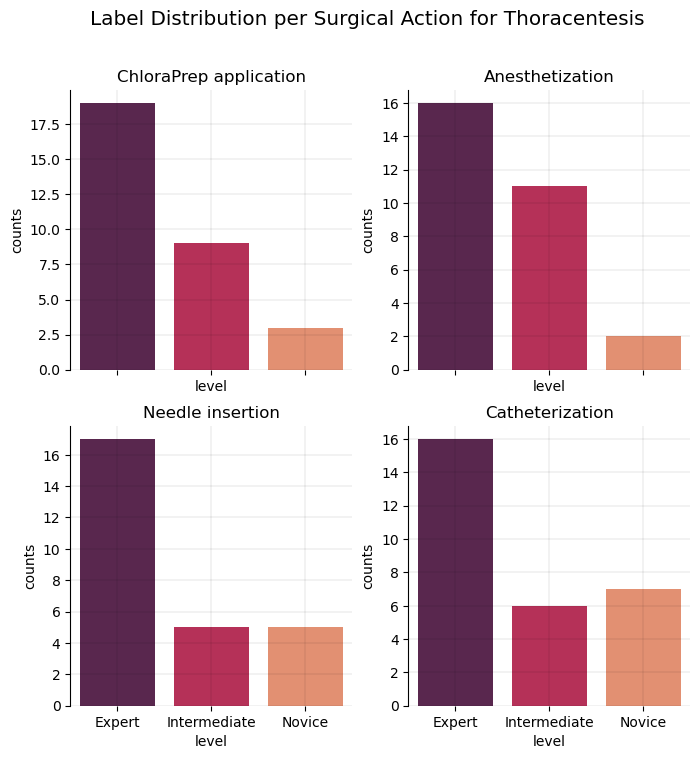

In [74]:
# label distribution
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def get_value_counts(df:pd.DataFrame, col:str)-> pd.DataFrame:
    
    vc = df[col].value_counts().to_frame().reset_index()
    vc = vc.rename(columns={'index':'level',col:'counts'})    
    vc = vc.sort_values('level')        
    return vc

## ---------------- Pericardiocentesis ------------------------- ##
# read label file
df = pd.read_csv(source_path + surgery_name_list[0] + ".csv", sep=',')

fig,ax = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Label Distribution per Surgical Action for Pericardiocentesis Procedure', fontsize='x-large')
ax[0].set_title("ChloraPrep application")
ax[1].set_title("Needle insertion")

value_count_df = get_value_counts(df, '0')
sns.barplot(ax=ax[0], x='level', y='counts', data=value_count_df, palette="rocket")
ax[0].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[0].grid(visible=True, which='minor', color='black', linewidth=0.075)

value_count_df = get_value_counts(df, '1')
sns.barplot(ax=ax[1], x='level', y='counts', data=value_count_df, palette="rocket")
ax[1].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[1].grid(visible=True, which='minor', color='black', linewidth=0.075)

sns.despine(bottom=True)
plt.show()

## ---------------- Thoracentesis ------------------------- ##
df = pd.read_csv(source_path + surgery_name_list[1] + ".csv", sep=',')

fig,ax = plt.subplots(2, 2, sharex=True, figsize=(8,8))
fig.suptitle('Label Distribution per Surgical Action for Thoracentesis ', fontsize='x-large')
ax[0][0].set_title("ChloraPrep application")
ax[0][1].set_title("Anesthetization")
ax[1][0].set_title("Needle insertion")
ax[1][1].set_title("Catheterization")

value_count_df = get_value_counts(df, '0')
sns.barplot(ax=ax[0][0], x='level', y='counts', data=value_count_df, palette="rocket")
ax[0][0].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[0][0].grid(visible=True, which='minor', color='black', linewidth=0.075)

value_count_df = get_value_counts(df, '3')
sns.barplot(ax=ax[0][1], x='level', y='counts', data=value_count_df,palette="rocket")
ax[0][1].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[0][1].grid(visible=True, which='minor', color='black', linewidth=0.075)

value_count_df = get_value_counts(df, '1')
sns.barplot(ax=ax[1][0], x='level', y='counts', data=value_count_df, palette="rocket")
ax[1][0].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[1][0].grid(visible=True, which='minor', color='black', linewidth=0.075)

value_count_df = get_value_counts(df, '2')
sns.barplot(ax=ax[1][1], x='level', y='counts', data=value_count_df, palette="rocket", order=value_count_df['level'])
ax[1][1].grid(visible=True, which='major', color='black', linewidth=0.075)
ax[1][1].grid(visible=True, which='minor', color='black', linewidth=0.075)

sns.despine(bottom=True)
plt.show()



C:\Users\nshet\AppData\Local\Temp\ipykernel_38520\160711315.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_df = seq_df.append(pd.DataFrame(range(0, length_of_df)), ignore_index=True)
C:\Users\nshet\AppData\Local\Temp\ipykernel_38520\160711315.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df, ignore_index=True)
C:\Users\nshet\AppData\Local\Temp\ipykernel_38520\160711315.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seq_df = seq_df.append(pd.DataFrame(range(0, length_of_df)), ignore_index=True)
C:\Users\nshet\AppData\Local\Temp\ipykernel_38520\160711315.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

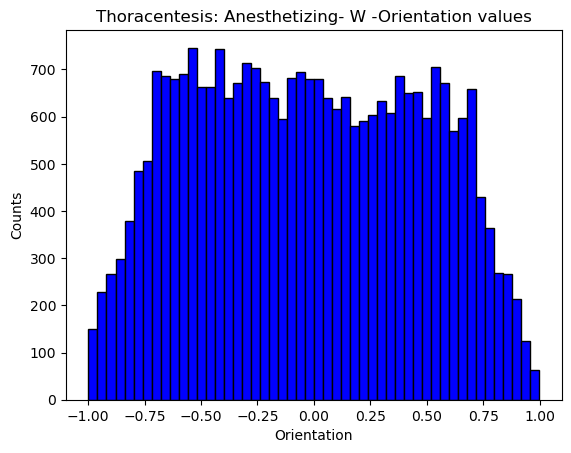

In [7]:
column_name_list = ['X', 'Y', 'Z', 'W', 'Qx', 'Qy', 'Qz', 'Vx', 'Vy', 'Vz', 'VQx', 'VQy', 'VQz']
data_type_list = ['Position', 'Orientation', 'Linear_Velocity', 'Angular_Velocity']
action_list = ['Chloraprep', 'Scalpel_Incision', 'Trocar_Insertion', 'Anesthetizing']
# action_list = ['Chloraprep', 'Needle_Insertion']
action_legends = [0,0,0]
fig, ax1 = plt.subplots()

main_df = pd.DataFrame()
seq_df = pd.DataFrame()

column_index = 3
column_name = column_name_list[3]
data_type = data_type_list[1] # type of data, position, velocity
action_selected = action_list[3] # surgical action
sensor_id = 3  # sensor Id

# Get list of all data directories
performance_list = os.listdir(source_path + input_folder + surgery_name_list[surgery_selected] + os.sep)
for individual_performance in performance_list:
    sensor_data = [f for f in os.listdir(source_path + input_folder + surgery_name_list[surgery_selected]
                                         + os.sep + individual_performance + os.sep)
                   if fnmatch.fnmatch(f, str(sensor_id) + '.csv')]

    for data_sample in sensor_data:
        try:
            # read sensor data csv
            df = pd.read_csv(source_path + input_folder + surgery_name_list[surgery_selected] 
                             + os.sep + individual_performance + '/' + data_sample)

        except pd.errors.EmptyDataError:
            continue
        
        # removing index column
        # df = df.drop(columns=['SId'], axis=1)
        # get length of data
        length_of_df = df.shape[0]
        # create a sequence of numbers for plotting
        # seq_df = pd.DataFrame(range(0, length_of_df))
        # seq_df = seq_df.append(pd.DataFrame(range(0, length_of_df)), ignore_index=True)
        # attach data to
        seq_df = seq_df.append(pd.DataFrame(range(0, length_of_df)), ignore_index=True)
        main_df = main_df.append(df, ignore_index=True)
        # ax1.scatter(main_np_arr[:,8],main_np_arr[:,4], label=labels_legend[i])
main_np_arr = main_df.to_numpy()
seq_np_arr = seq_df.to_numpy()
plt.hist(main_np_arr[:,column_index], color='blue', edgecolor='black', bins= 50 )
# ax1.scatter(main_np_arr[:, column_index], seq_np_arr[:, 0], s=5)
# fig = plt.figure()
# ax = plt.axes(projection='3d')

plt.title(surgery_name_list[surgery_selected][1:] + ': ' + action_selected +
          '- ' + column_name + ' -' + data_type + ' values')
plt.xlabel(data_type)
plt.ylabel('Counts')
# plt.xlim([-150,150])
# plt.ylim([0,1250])
# plt.xticks(np.arange(-150,150,25))
plt.savefig(source_path + save_to_folder + '/' +
            surgery_name_list[surgery_selected][1:] + '_' + str(action_selected) +
            '_' + column_name + '_' + data_type + '.png',
            dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Label balancing during data augmentation


Class: 1_Expert_412021_34434_PM.csv
57057
Class: 1_Expert_412021_40051_PM.csv
22833
Class: 1_Expert_412021_43042_PM.csv
114095


IndexError: list index out of range